[![Buy Me A Coffee](https://img.shields.io/badge/Buy%20Me%20A%20Coffee-support%20my%20work-FFDD00?style=flat&labelColor=101010&logo=buy-me-a-coffee&logoColor=white)](https://www.buymeacoffee.com/r0mymendez)

---

#  You Asked, I Coded: AWS Architecture as Diagram-as-Code

A few days ago, someone left a comment on my previous article — a post that turned out to be very popular, reaching over 50K views and earning 300 GitHub stars ⭐️.
❤️ I **want to sincerely thank** every single reader who took the time to read, leave feedback, and star the repository...
Your support truly motivates me to keep writing, sharing, and growing with the community.


![Image description](img/aws-diagram-as-code.png)

---

## 🙃 A Reader’s Question That Inspired This Post <br>

<div style="border: 1px solid #ddd; padding: 16px; border-radius: 10px; background-color: #fff; color: #333; max-width: 600px; font-family: Arial, sans-serif; box-shadow: 0 1px 3px rgba(0,0,0,0.05);">
  <div style="display: flex; align-items: center; margin-bottom: 10px;">
    <div style="font-weight: bold; font-size: 15px;">👤 @reader</div>
    <div style="margin-left: auto; font-size: 13px; color: #999;">📅 May 2, 2025</div>
  </div>

  <div style="font-size: 14px; line-height: 1.5;">
    Hey Romina, would you please make this diagram using <strong>Diagram as Code</strong>?<br><br>
    🔗 <a href="https://github.com/aws-samples/aws-three-tier-web-architecture-workshop/blob/main/application-code/web-tier/src/assets/3TierArch.png" target="_blank">Link to the original diagram</a>
  </div>

  <hr style="border: none; border-top: 1px solid #eee; margin: 16px 0;">

  <div style="font-size: 13px; color: #777;">
    👍 1  💬 1 replies  <a href="#" style="text-decoration: none; color: #555;">Reply</a>
  </div>
</div>



---

# Haven’t read my first article?
If you’re new to Diagram-as-Code, I highly recommend starting with my introductory tutorial.

[Link to the article](https://dev.to/r0mymendez/diagram-as-code-creating-dynamic-and-interactive-documentation-for-visual-content-2p93)

![img-diagram](img/post-diagram-as-code.png)

---

# What is Diagram-as-Code?

Let’s go over a quick introduction to Diagram-as-Code.<br>

> **Diagram-as-Code** is an approach that allows you to define diagrams through code instead of drawing them manually.
This method makes it possible to version, update, and maintain visual representations just like any other software artifact.

For a more in depth explanation, feel free to check out my previous article.

---

## In this tutorial I will cover:

1. 🔧 Key Components: `Diagram`, `Cluster`, and `Node`
2. 🎨 Styling with `graph_attr`
3. ☁️ Creating an AWS Three-Tier Web Architecture

---

### 1. 🔧 Diagram-as-Code: Key Components
To replicate the AWS architecture, we’ll use three primary objects from the diagrams library:


|Component |	Description |
| ---- |-------------- |
|Diagram |	The canvas or global graph context |
|Cluster |	A grouped section like a VPC, tier, or AZ |
|Node	|An infrastructure element (e.g., EC2, RDS, S3, etc.)|

---

### 2. 🎨 Styling with `graph_attr`
To create more advanced or customized diagrams, we can modify attributes like colors, fonts, and layout.
**Graphviz** (the underlying engine) supports styling attributes similar to `CSS`.  
Below are the attributes used in this tutorial:

| Attribute  | Purpose             | Example               |
| ---------- | ------------------- | --------------------- |
| fillcolor  | Background color     | `"lightblue"` or `"#000000"` |
| pencolor   | Border color         | `"#12b886"`           |
| penwidth   | Border thickness     | `"2"`                 |
| fontname   | Font style           | `"Helvetica-Bold"`    |
| fontsize   | Font size            | `"14"`                |
| labeljust  | Text alignment       | `"c"` (center)        |
| splines    | Arrow shape          | `"curved"`            |

---

### 3. Challenge: Recreate an AWS Workshop Diagram

#### 1. Original Architecture Diagram  
The following image comes from the AWS workshop repository:  
[link](https://github.com/aws-samples/aws-three-tier-web-architecture-workshop)

![Architecture Image](https://github.com/aws-samples/aws-three-tier-web-architecture-workshop/blob/main/application-code/web-tier/src/assets/3TierArch.png?raw=true)


#### 2. Code  
Here is the code I used to recreate the image above.
I customized the appearance of the different clusters using `graph_attr`.


In [ ]:
# install libraries
!pip uninstall diagrams
!pip install diagrams=='0.23.4'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.3/860.3 kB 42.6 MB/s eta 0:00:00


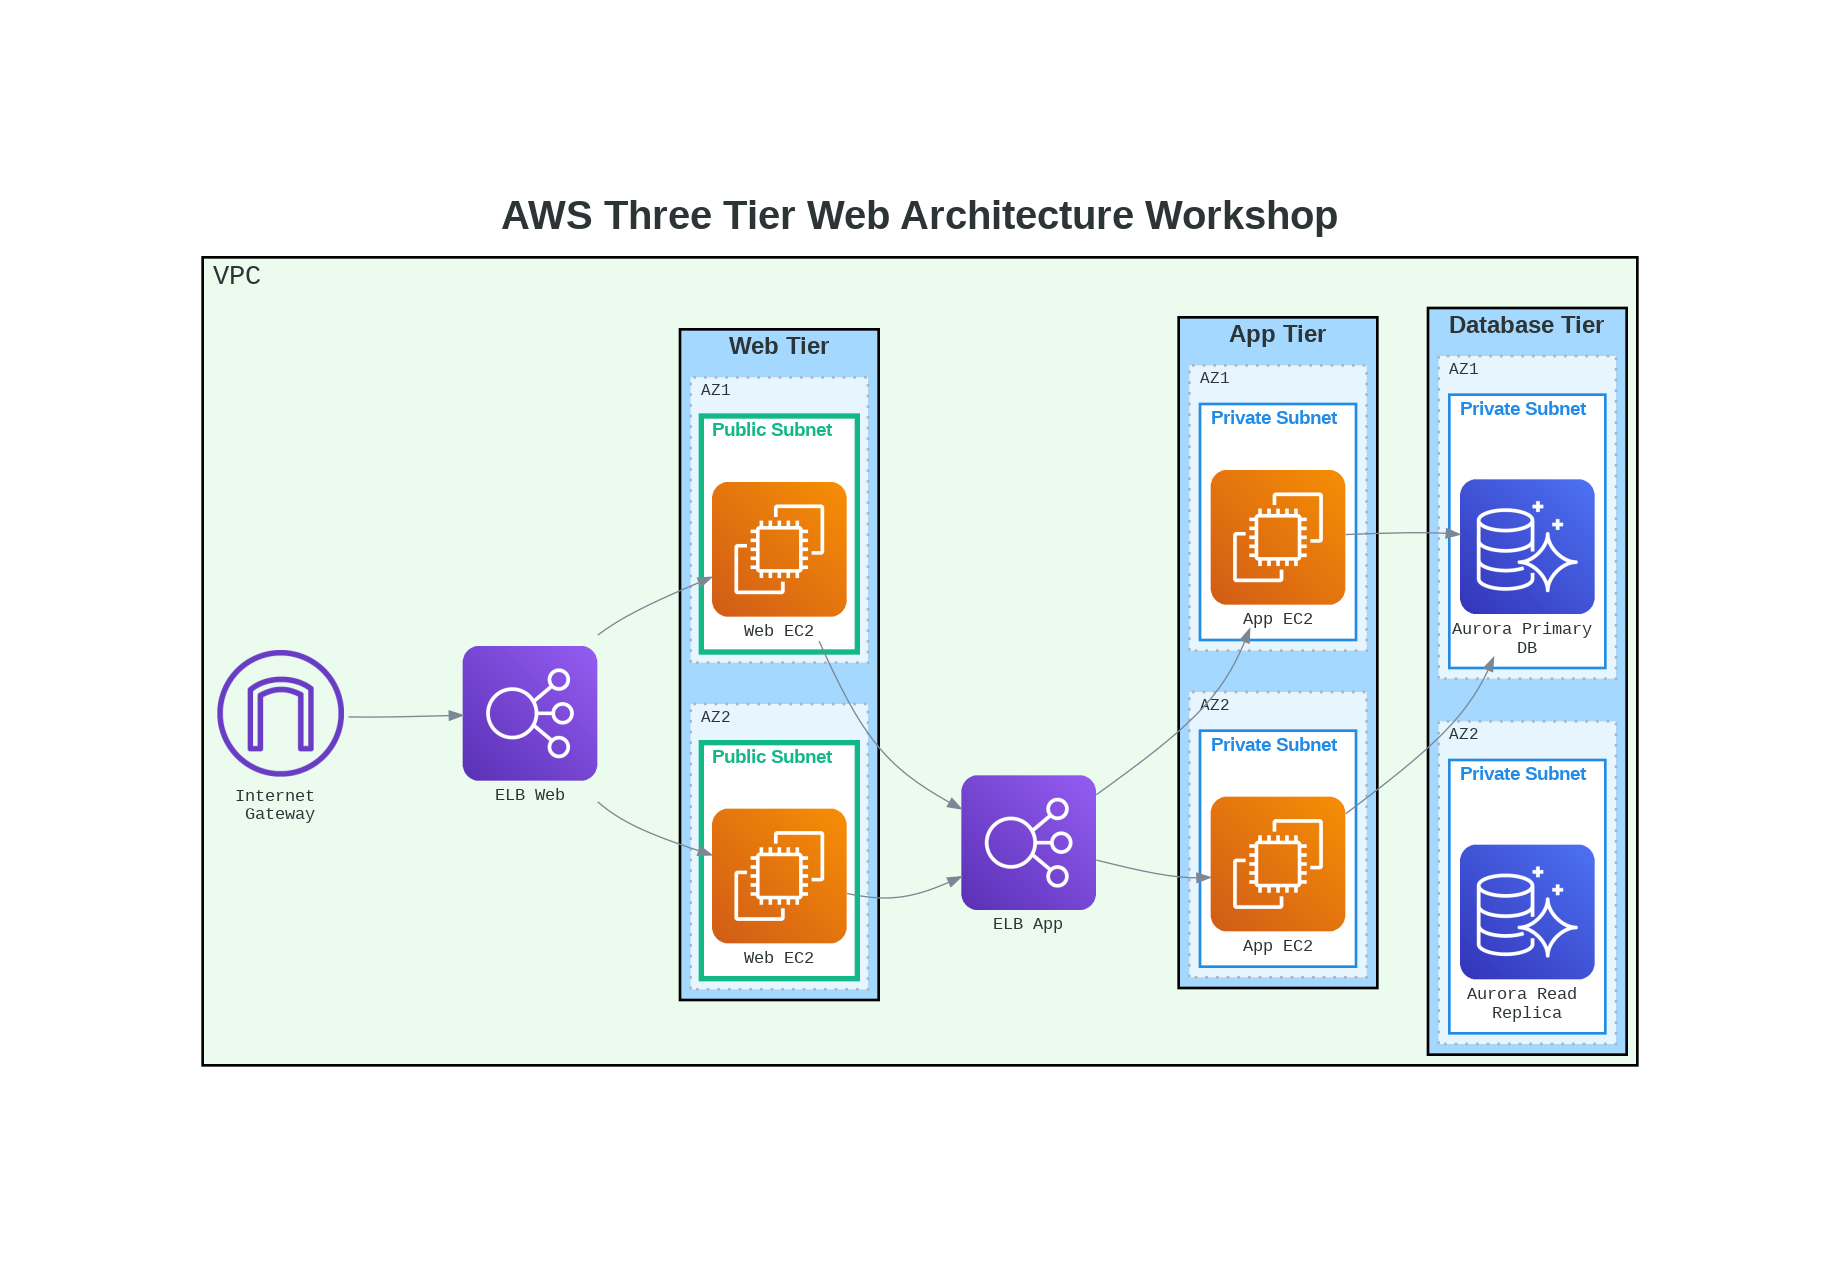

In [ ]:
from diagrams import Diagram, Cluster,Node
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB, InternetGateway
from diagrams.aws.database import Aurora
from diagrams.aws.general import Users
from IPython.display import Image
from IPython.display import SVG, display

_cluster_layers_graph_attr ={"style": "filled",
                             "fillcolor": "lightblue",
                             "fontname": "Helvetica-Bold",
                             "fontsize": "18",
                             "penwidth": "2",
                             "pencolor":"#000000",
                             "labeljust": "c",
                             "fillcolor":"#a5d8ff"
                             }

_public_subnet_graph_attr ={"style": "filled",
                            "fillcolor": "white",
                            "pencolor":"#12b886",
                            "fontcolor": "#12b886" ,
                            "fontname": "Helvetica-Bold",
                            "penwidth": "4",
                            "fontsize": "14"
                            }

_private_subnet_graph_attr ={"style": "filled",
                            "fillcolor": "white",
                            "pencolor":"#228be6",
                            "fontcolor": "#228be6" ,
                            "fontname": "Helvetica-Bold",
                            "penwidth": "2",
                            "fontsize": "14"
                            }

_az_graph_attr = {"style": "filled",
        "fillcolor": "#e7f5ff",
        "style": "filled, dotted",
        "penwidth": "2"
        }

diagram_graph_attr ={
         "labelloc": "t",
        "fontsize": "30",
        "fontname": "Helvetica-Bold",
        "splines": "curved",
        "nodesep": "1.5",
        "ranksep": "1.2"
    }

with Diagram("AWS Three Tier Web Architecture Workshop",
             show=False,
             filename="aws_full",
             outformat="png",
             graph_attr=diagram_graph_attr):


    with Cluster( graph_attr={"label":"VPC",
                              "fontsize": "20",
                              "style": "filled",
                              "fillcolor": "#ebfbee",
                              "penwidth": "2",
                              "pencolor":"#000000"
                              }):

        # Internet Gateway y ELB Web (externo)
        igw = InternetGateway("Internet \nGateway")
        elb_web = ELB("ELB Web")
        elb_app = ELB("ELB App")

        # ---------------- Web Tier ----------------
        with Cluster("Web Tier", graph_attr=_cluster_layers_graph_attr):
            with Cluster("AZ1", graph_attr=_az_graph_attr):
               with Cluster("Public Subnet", graph_attr= _public_subnet_graph_attr):
                  ec2_web_az1 = EC2("Web EC2")
            with Cluster("AZ2", graph_attr=_az_graph_attr):
              with Cluster("Public Subnet", graph_attr=_public_subnet_graph_attr):
                  ec2_web_az2 = EC2("Web EC2")

        igw >> elb_web
        elb_web >> [ec2_web_az1, ec2_web_az2]
        ec2_web_az1 >> elb_app
        ec2_web_az2 >> elb_app

        # ---------------- App Tier ----------------
        with Cluster("App Tier", graph_attr=_cluster_layers_graph_attr,direction='TB'):
            with Cluster("AZ1", graph_attr=_az_graph_attr):
              with Cluster("Private Subnet", graph_attr=_private_subnet_graph_attr):
                ec2_app_az1 = EC2("App EC2")
            with Cluster("AZ2", graph_attr=_az_graph_attr):
              with Cluster("Private Subnet", graph_attr=_private_subnet_graph_attr):
                ec2_app_az2 = EC2("App EC2")

        elb_app >> [ec2_app_az1, ec2_app_az2]

        # ---------------- Database Tier ----------------
        with Cluster("Database Tier", graph_attr=_cluster_layers_graph_attr,direction='TB'):
            with Cluster("AZ1", graph_attr=_az_graph_attr):
                with Cluster("Private Subnet", graph_attr=_private_subnet_graph_attr):
                  aurora_primary = Aurora("Aurora Primary \nDB")
            with Cluster("AZ2", graph_attr=_az_graph_attr):
              with Cluster("Private Subnet", graph_attr=_private_subnet_graph_attr):
                  aurora_readreplica = Aurora("Aurora Read \nReplica") #

            ec2_app_az1 >> aurora_primary
            ec2_app_az2 >> aurora_primary

Image("aws_full.png")


## Final Conclusions

Using **Diagram-as-Code** is an effective approach for maintaining architecture diagrams in a consistent, automated, and version-controlled manner. However, it is essential to recognize both its limitations and its advantages.

### ❌ Limitations
1. **Accurately replicating a visual design** can be difficult. The library does not natively support complex layouts — such as a node appearing in multiple clusters — and managing deeply nested clusters can quickly become cumbersome.

### ✅ Benefits
1. Despite these challenges, **Diagrams** remains tool for defining infrastructure visually through code.

2. It allows seamless **version control** of visual documentation alongside the project’s source code.

3. Teams can **track architectural changes** over time providing traceability.

4. It enables the **automation of documentation pipelines**, particularly beneficial in DevOps and cloud-native environments.

5. When integrated with **AI-powered tools**, this approach offers exciting opportunities — from enabling agents to query diagrams, to automatically generating changelogs and visualizing the **evolution of an architecture** over time.



---

# 📚 References
* [Diagrams Library Documentation](https://diagrams.mingrammer.com/)
* [AWS Three-Tier Architecture Workshop](https://github.com/aws-samples/aws-three-tier-web-architecture-workshop)
